In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [212]:
data = pd.read_csv("task_3_training_e8da4715deef7d56_f8b7378_generic.csv")
data


,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary,gemmes_flow_binary
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [213]:
data.filter(regex='essentia')

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,essentia_spectral_complexity_stdev,essentia_spectral_rolloff_mean,essentia_spectral_rolloff_stdev,essentia_strong_peak_mean,essentia_strong_peak_stdev
0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,1290.972900,936.912476,30.490740,2.349135,470.640045,1207.823608,1865.832520,1891.272705
1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,1133.526733,286.292847,28.111111,2.491034,629.848083,110.834175,11119.455078,7483.725586
2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,1050.947632,181.327225,28.354166,2.456479,642.310303,73.311058,12910.441406,8518.729492
3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,1076.780151,251.776215,29.354166,2.680005,607.117310,144.477844,9481.676758,9443.319336
4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,1008.112183,196.336700,29.375000,2.327000,534.941101,140.277069,10990.607422,8683.046875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,866.423889,133.063477,29.842592,2.253237,557.669861,118.683922,9583.834961,8391.625977
2278,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,828.768005,234.908127,30.296297,2.417182,450.901520,111.266678,1573.880493,1625.528564
2279,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,841.285645,226.538666,29.761574,2.482551,436.645477,110.298874,1297.203003,1514.652710
2280,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,716.426025,181.553772,29.881945,2.332827,464.358948,95.393364,3449.008789,2222.799316


In [214]:
data.filter(regex='librosa')

,librosa_bpm,librosa_chroma_mean_0,librosa_chroma_std_0,librosa_chroma_pct_10_0,librosa_chroma_pct_50_0,librosa_chroma_pct_90_0,librosa_chroma_mean_1,librosa_chroma_std_1,librosa_chroma_pct_10_1,librosa_chroma_pct_50_1,...,librosa_mfcc_mean_10,librosa_mfcc_std_10,librosa_mfcc_pct_10,librosa_mfcc_pct_50_10,librosa_mfcc_pct_90_10,librosa_mfcc_mean_11,librosa_mfcc_std_11,librosa_mfcc_pct_10_11,librosa_mfcc_pct_50_11,librosa_mfcc_pct_90_11
0,258.398438,0.373053,0.225611,0.135992,0.306941,0.703219,0.496350,0.220451,0.190233,0.531737,...,-2.489361,5.159132,-9.105977,-2.555340,3.976348,-1.905400,4.818770,-7.804691,-2.013212,4.252598
1,224.694293,0.091861,0.103458,0.013954,0.046071,0.270376,0.290538,0.240936,0.025029,0.324773,...,-3.137916,5.527211,-10.413605,-2.766848,3.652313,-4.067523,5.830081,-11.670424,-3.595830,3.299112
2,215.332031,0.161526,0.156989,0.013687,0.097885,0.370713,0.405277,0.319424,0.034594,0.326936,...,-4.036878,5.383811,-10.791273,-3.892330,2.779138,-5.481335,5.246166,-12.275232,-5.342162,0.955623
3,117.453835,0.152805,0.117782,0.022889,0.127496,0.322117,0.359905,0.255683,0.021070,0.407567,...,-3.695331,5.778541,-11.451571,-3.310619,3.459964,-3.274777,7.116310,-11.206470,-4.524760,7.043891
4,246.093750,0.202821,0.190843,0.016961,0.141174,0.459136,0.457662,0.320764,0.044929,0.410079,...,-5.760437,5.709575,-13.446388,-5.435995,1.234058,-6.179785,6.308616,-15.086003,-5.660230,1.892022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,246.093750,0.256839,0.266703,0.044726,0.144942,0.700913,0.260586,0.184603,0.058368,0.216271,...,-10.414947,4.865432,-16.887890,-10.350103,-3.848135,-8.786631,4.681174,-14.574200,-8.600704,-3.192562
2278,246.093750,0.660066,0.284973,0.280775,0.652290,1.000000,0.503727,0.256417,0.168147,0.486723,...,-5.602749,5.236038,-12.136916,-5.580261,1.215536,-6.720737,5.024703,-12.804048,-6.603259,-0.765713
2279,191.406250,0.317021,0.262035,0.049673,0.241737,0.699241,0.468953,0.327868,0.107321,0.378984,...,-3.349715,4.957078,-9.885340,-3.188201,3.309269,-2.862301,5.357865,-9.897942,-2.760796,4.268817
2280,258.398438,0.270779,0.168223,0.100047,0.227485,0.449106,0.474469,0.333709,0.100494,0.391627,...,-6.054935,5.303769,-13.109940,-6.485728,0.923183,-6.751603,5.022251,-13.537580,-6.450807,-0.887911


In [215]:
data.filter(regex='mirtoolbox')

,mirtoolbox_brightness,mirtoolbox_crescendo,mirtoolbox_dynamics_mean,mirtoolbox_dynamics_std,mirtoolbox_dynamics_pct_10,mirtoolbox_dynamics_pct_50,mirtoolbox_dynamics_pct_90,mirtoolbox_hcdf_mean,mirtoolbox_hcdf_std,mirtoolbox_hcdf_pct_10,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,0.138312,0.013090,-76.251059,10.140531,-75.723963,-75.324915,-75.279211,0.203396,0.106959,0.077880,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,0.140055,0.085301,-61.443286,11.372958,-60.983283,-60.904897,-58.931076,0.295592,0.144883,0.113479,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,0.131134,0.004834,-55.204632,11.863459,-54.543265,-54.166873,-54.111344,0.289712,0.155723,0.126654,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,0.174673,0.159619,-53.715012,12.132573,-53.342435,-51.887136,-51.829872,0.257898,0.193532,0.086685,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,0.155665,0.000000,-58.496605,11.601717,-58.030885,-57.142992,-57.073355,0.311727,0.159539,0.115372,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0.152974,0.000000,-53.289369,12.019268,-52.436725,-52.279647,-52.222382,0.406196,0.166870,0.214162,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
2278,0.101128,0.242002,-74.693800,11.595382,-85.024776,-70.846186,-70.790657,0.284063,0.206826,0.092215,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
2279,0.126772,0.000000,-66.063562,10.972754,-65.288956,-65.139073,-65.088583,0.334015,0.252126,0.052282,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
2280,0.117293,0.056483,-69.548906,10.765416,-70.558296,-67.711884,-67.656355,0.347355,0.161641,0.178608,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


In [216]:
data.filter(regex='midlevel')

,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness
0,0.287032,-0.284226,-0.271440,-0.073550,-0.413004,0.334240,0.152436
1,0.317098,-0.301676,-0.253851,-0.061130,-0.421232,0.336180,0.111838
2,0.318557,-0.354457,-0.299241,-0.086770,-0.444719,0.335987,-0.015267
3,0.304550,-0.427759,-0.298822,-0.153465,-0.404922,0.274274,-0.045132
4,0.231792,-0.345944,-0.231145,-0.170548,-0.341099,0.246358,-0.128247
...,...,...,...,...,...,...,...
2277,0.038507,-0.158969,-0.225481,-0.175239,-0.232897,0.216191,-0.113735
2278,0.018053,-0.192053,-0.233269,-0.240172,-0.242610,0.185704,-0.059602
2279,-0.017201,-0.276259,-0.214809,-0.273117,-0.191629,0.132857,0.054475
2280,-0.029910,-0.258118,-0.203812,-0.262117,-0.188480,0.144021,0.079083


In [217]:
data.filter(regex='gems')

,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gems_wonder_binary,gems_transcendence_binary,gems_tenderness_binary,gems_nostalgia_binary,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary
0,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,3.181818,3.272727,2.818182,3.636364,3.181818,2.272727,2.363636,2.272727,2.363636,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2278,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2280,3.090909,1.909091,1.454545,2.454545,1.909091,2.545455,2.181818,1.727273,1.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
data.filter(regex='gemmes')

,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,gemmes_flow,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary,gemmes_flow_binary
0,2.090909,1.909091,2.454545,3.363636,3.636364,0.0,0.0,0.0,1.0,1.0
1,2.090909,1.909091,2.454545,3.363636,3.636364,0.0,0.0,0.0,1.0,1.0
2,2.090909,1.909091,2.454545,3.363636,3.636364,0.0,0.0,0.0,1.0,1.0
3,2.090909,1.909091,2.454545,3.363636,3.636364,0.0,0.0,0.0,1.0,1.0
4,2.090909,1.909091,2.454545,3.363636,3.636364,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2277,2.272727,2.727273,2.545455,2.090909,3.090909,0.0,0.0,0.0,0.0,1.0
2278,2.272727,2.727273,2.545455,2.090909,3.090909,0.0,0.0,0.0,0.0,1.0
2279,2.272727,2.727273,2.545455,2.090909,3.090909,0.0,0.0,0.0,0.0,1.0
2280,2.272727,2.727273,2.545455,2.090909,3.090909,0.0,0.0,0.0,0.0,1.0


In [219]:
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
data_filtered

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90,quadrant,valence,arousal
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025,3.0,-0.363636,2.818182
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610,3.0,-0.363636,2.818182
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690,3.0,-0.363636,2.818182
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971,3.0,-0.363636,2.818182
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731,3.0,-0.363636,2.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522,1.0,0.545455,3.090909
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763,1.0,0.545455,3.090909
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254,1.0,0.545455,3.090909
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997,1.0,0.545455,3.090909


In [220]:
correlation = data.corr()
correlation

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,gems_peacefulness_binary,gems_power_binary,gems_joyful_activation_binary,gems_tension_binary,gems_sadness_binary,gemmes_movement_binary,gemmes_force_binary,gemmes_interior_binary,gemmes_wandering_binary,gemmes_flow_binary
pianist_id,1.000000,0.001988,-0.017890,0.068393,-0.007745,0.025530,-0.142609,-0.012397,0.038523,-0.029373,...,-0.029071,-0.015426,-0.037035,-0.057701,-0.122222,-0.131611,-0.059350,0.010718,-0.044796,-0.073107
segment_id,0.001988,1.000000,-0.054436,-0.205015,0.044546,0.067235,-0.070141,0.038189,-0.114867,0.105625,...,0.039324,0.031359,-0.085743,0.071277,-0.008940,-0.095881,0.019940,0.082420,-0.067392,-0.061764
snippet_id,-0.017890,-0.054436,1.000000,-0.109450,-0.107201,-0.018878,-0.171250,-0.043181,0.010059,0.035243,...,0.214000,-0.106967,-0.087440,-0.132232,0.044349,-0.104058,-0.117429,0.139821,0.135429,0.177702
essentia_dissonance_mean,0.068393,-0.205015,-0.109450,1.000000,0.116425,-0.220164,0.541317,0.037410,0.454481,-0.420966,...,-0.463243,0.330028,0.099405,0.404095,-0.054310,0.231053,0.347807,-0.331930,-0.279155,-0.419046
essentia_dissonance_stdev,-0.007745,0.044546,-0.107201,0.116425,1.000000,0.218579,-0.116427,0.085701,-0.104490,0.135578,...,-0.143933,0.029112,0.092850,0.082236,0.014162,0.030264,-0.005226,-0.091986,-0.047482,-0.147574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gemmes_movement_binary,-0.131611,-0.095881,-0.104058,0.231053,0.030264,-0.111658,0.288691,0.165707,0.159951,-0.135373,...,-0.329240,0.281883,0.295208,0.284008,-0.160684,1.000000,0.408887,-0.249927,-0.175651,-0.263087
gemmes_force_binary,-0.059350,0.019940,-0.117429,0.347807,-0.005226,-0.148003,0.460740,0.132870,0.220423,-0.189596,...,-0.290993,0.420473,0.001940,0.435739,-0.082823,0.408887,1.000000,-0.181095,-0.199096,-0.375031
gemmes_interior_binary,0.010718,0.082420,0.139821,-0.331930,-0.091986,0.075839,-0.221686,-0.123785,-0.161551,0.094889,...,0.344634,-0.214633,-0.131190,-0.214764,0.126877,-0.249927,-0.181095,1.000000,0.283547,0.269742
gemmes_wandering_binary,-0.044796,-0.067392,0.135429,-0.279155,-0.047482,0.061011,-0.206307,-0.131802,-0.222133,0.131308,...,0.398797,-0.233317,-0.158624,-0.343430,-0.019064,-0.175651,-0.199096,0.283547,1.000000,0.418350


In [221]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlation, 50))
def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(correlation, 50))
def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr
ordered_corr = get_all_abs_correlations(correlation)

print(ordered_corr[:60])
def get_all_abs_correlations_desc(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
ordered_corr_desc = get_all_abs_correlations_desc(correlation)

print(ordered_corr_desc[:60])


Top Absolute Correlations
librosa_mfcc_mean_0         librosa_mfcc_pct_50_0          0.999967
librosa_mfcc_mean_2         librosa_mfcc_pct_50_2          0.999935
librosa_mfcc_mean_6         librosa_mfcc_pct_50_6          0.999857
mirtoolbox_roughness_mean   mirtoolbox_roughness_pct_50    0.999846
librosa_mfcc_mean_7         librosa_mfcc_pct_50_7          0.999777
librosa_mfcc_mean_3         librosa_mfcc_pct_50_3          0.999716
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_50     0.999591
librosa_mfcc_mean_8         librosa_mfcc_pct_50_8          0.999548
librosa_mfcc_mean_5         librosa_mfcc_pct_50_5          0.999521
librosa_mfcc_mean_1         librosa_mfcc_pct_50_1          0.999304
librosa_mfcc_mean_10        librosa_mfcc_pct_50_10         0.998856
mirtoolbox_dynamics_pct_50  mirtoolbox_dynamics_pct_90     0.998853
librosa_mfcc_mean_9         librosa_mfcc_pct_50_9          0.998843
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_10     0.998588
                      

librosa_mfcc_mean_0          librosa_mfcc_pct_50_0          0.999967
librosa_mfcc_mean_2          librosa_mfcc_pct_50_2          0.999935
librosa_mfcc_mean_6          librosa_mfcc_pct_50_6          0.999857
mirtoolbox_roughness_mean    mirtoolbox_roughness_pct_50    0.999846
librosa_mfcc_mean_7          librosa_mfcc_pct_50_7          0.999777
librosa_mfcc_mean_3          librosa_mfcc_pct_50_3          0.999716
mirtoolbox_dynamics_mean     mirtoolbox_dynamics_pct_50     0.999591
librosa_mfcc_mean_8          librosa_mfcc_pct_50_8          0.999548
librosa_mfcc_mean_5          librosa_mfcc_pct_50_5          0.999521
librosa_mfcc_mean_1          librosa_mfcc_pct_50_1          0.999304
librosa_mfcc_mean_10         librosa_mfcc_pct_50_10         0.998856
mirtoolbox_dynamics_pct_50   mirtoolbox_dynamics_pct_90     0.998853
librosa_mfcc_mean_9          librosa_mfcc_pct_50_9          0.998843
mirtoolbox_dynamics_mean     mirtoolbox_dynamics_pct_10     0.998588
                             mirto

In [222]:
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_filtered

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,quadrant,valence,arousal
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161,3.0,-0.363636,2.818182
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194,3.0,-0.363636,2.818182
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.655391,-0.002827,0.143144,0.00000,0.209162,0.007467,0.003986,3.0,-0.363636,2.818182
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063,3.0,-0.363636,2.818182
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917,3.0,-0.363636,2.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991,1.0,0.545455,3.090909
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529,1.0,0.545455,3.090909
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808,1.0,0.545455,3.090909
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881,1.0,0.545455,3.090909


In [223]:
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
data_targets

,quadrant,valence,arousal
0,3.0,-0.363636,2.818182
1,3.0,-0.363636,2.818182
2,3.0,-0.363636,2.818182
3,3.0,-0.363636,2.818182
4,3.0,-0.363636,2.818182
...,...,...,...
2277,1.0,0.545455,3.090909
2278,1.0,0.545455,3.090909
2279,1.0,0.545455,3.090909
2280,1.0,0.545455,3.090909


In [261]:
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
feature_names = list(X.columns)
print(feature_names)

['pianist_id', 'segment_id', 'snippet_id', 'essentia_dissonance_mean', 'essentia_dissonance_stdev', 'essentia_dynamic_complexity', 'essentia_loudness', 'essentia_onset_rate', 'essentia_pitch_salience_mean', 'essentia_pitch_salience_stdev', 'essentia_spectral_centroid_mean', 'essentia_spectral_centroid_stdev', 'essentia_spectral_complexity_mean', 'essentia_spectral_complexity_stdev', 'essentia_spectral_rolloff_mean', 'essentia_spectral_rolloff_stdev', 'essentia_strong_peak_mean', 'librosa_bpm', 'librosa_chroma_mean_0', 'librosa_chroma_std_0', 'librosa_chroma_pct_10_0', 'librosa_chroma_pct_90_0', 'librosa_chroma_mean_1', 'librosa_chroma_std_1', 'librosa_chroma_pct_10_1', 'librosa_chroma_pct_90_1', 'librosa_chroma_mean_2', 'librosa_chroma_std_2', 'librosa_chroma_pct_10_2', 'librosa_chroma_pct_90_2', 'librosa_chroma_mean_3', 'librosa_chroma_std_3', 'librosa_chroma_pct_90_3', 'librosa_chroma_mean_4', 'librosa_chroma_std_4', 'librosa_chroma_pct_10_4', 'librosa_chroma_pct_90_4', 'librosa_chro

In [262]:
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y

array([3., 3., 3., ..., 1., 1., 1.])

In [263]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
result = next(kf.split(X.to_numpy(), y), None)

train = X.iloc[result[0]]
test =  X.iloc[result[1]]

In [264]:
train

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.077880,0.357389,0.685941,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.113479,0.488570,0.911455,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.086685,0.481198,0.367500,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.115372,0.488982,1.002424,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917
5,1,0,5,0.196514,0.052237,2.566071,66282424.0,2.200000,0.584508,0.100911,...,0.129901,0.513714,0.582648,0.699472,0.039179,0.088127,0.00000,0.091799,0.009359,0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.214162,0.682742,0.250832,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.092215,0.533371,0.969141,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.052282,0.702560,0.256100,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.178608,0.607663,0.255105,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881


In [265]:
test

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.126654,0.493207,0.740554,0.655391,-0.002827,0.143144,0.000000,0.209162,0.007467,0.003986
62,1,6,12,0.195762,0.054038,1.650751,65885464.0,4.373398,0.576964,0.095918,...,0.154411,0.455670,0.447020,0.661684,0.074573,0.141053,0.000000,0.149663,0.011406,0.003618
67,1,7,4,0.225943,0.058967,1.339994,156672624.0,3.000000,0.648186,0.087664,...,0.139321,0.470631,0.274534,0.675268,-0.280677,0.081721,0.000000,0.133185,0.015127,0.004930
74,1,8,3,0.169778,0.065160,4.615561,67287496.0,1.852280,0.607226,0.102608,...,0.130897,0.472980,0.736538,0.813011,0.207040,0.069847,0.000000,0.110838,0.011128,0.006774
76,1,9,1,0.226559,0.065521,1.705109,100496784.0,3.400000,0.621009,0.092719,...,0.139423,0.442981,0.426168,0.781752,0.157758,0.094246,0.000000,0.157236,0.014241,0.004307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,22,1,0.142812,0.065007,2.547269,16216005.0,3.000000,0.555797,0.126262,...,0.090617,0.473097,0.836046,0.926008,0.099228,0.035435,0.000009,0.116657,0.008016,0.004037
2249,11,22,9,0.161294,0.059252,2.995837,29173024.0,3.400000,0.600145,0.110782,...,0.199239,0.552169,0.379475,0.636458,-0.029950,0.153426,0.000000,0.185843,0.009054,0.004111
2253,11,23,2,0.265052,0.099702,1.549239,35251556.0,3.400000,0.610611,0.109219,...,0.158637,0.476680,0.403751,0.652105,0.127109,0.110063,0.004220,0.127996,0.018429,0.007174
2258,11,24,1,0.170429,0.064642,3.810143,13938461.0,2.000000,0.669719,0.075449,...,0.045320,0.639122,0.263926,0.744871,0.236403,0.097617,0.000000,0.156304,0.008120,0.005910


In [266]:
X = X.to_numpy()


In [267]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [268]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [269]:
y_predict = clf_model.predict(X_test)

In [270]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.4868421052631579

In [271]:
target = (list(data_targets['quadrant'].unique()))
for i in range(len(target)):
    target[i]=str(target[i])
print(target)

['3.0', '1.0', '2.0', '4.0']


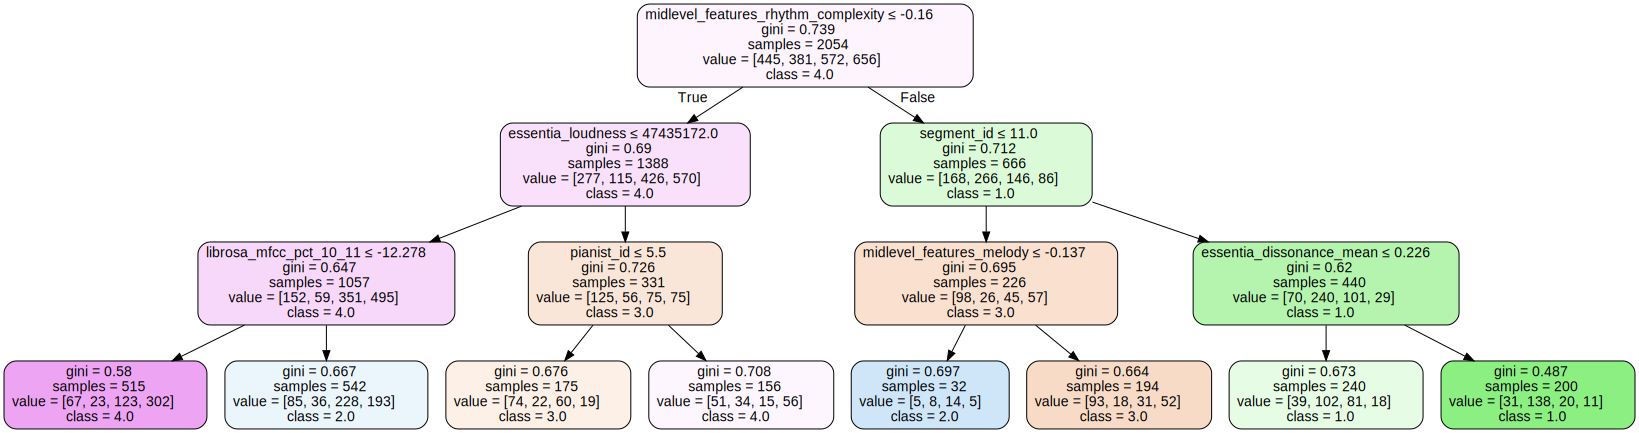

In [272]:

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                        feature_names=feature_names,  
                      class_names=target,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [273]:
from sklearn.tree import export_text
r = export_text(clf_model)
print(r)

|--- feature_94 <= -0.16
|   |--- feature_6 <= 47435172.00
|   |   |--- feature_90 <= -12.28
|   |   |   |--- class: 4.0
|   |   |--- feature_90 >  -12.28
|   |   |   |--- class: 3.0
|   |--- feature_6 >  47435172.00
|   |   |--- feature_0 <= 5.50
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  5.50
|   |   |   |--- class: 4.0
|--- feature_94 >  -0.16
|   |--- feature_1 <= 11.00
|   |   |--- feature_92 <= -0.14
|   |   |   |--- class: 3.0
|   |   |--- feature_92 >  -0.14
|   |   |   |--- class: 1.0
|   |--- feature_1 >  11.00
|   |   |--- feature_3 <= 0.23
|   |   |   |--- class: 2.0
|   |   |--- feature_3 >  0.23
|   |   |   |--- class: 2.0

